In [35]:
%matplotlib inline
import pandas as pd


In [34]:
from bs4 import BeautifulSoup
import requests
import io
import matplotlib.pyplot as plt
from ggplot import*

As we know, society is comprised of different families with diverse backgrounds. Since a given family plays a signficant role in the social establishment and development, the idea of 'family' always fascinates me. In this journey, I'll explore the two fundamental areas in which family creation is based -  marriage and divorce. Let the journey begin with some numbers that show the marriage rate and divorce rate in the US.

In [9]:
#Import csv file from the github
#DD represents the marriage rate among men
t = requests.get("https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage/men.csv").content
DD=pd.read_csv(io.StringIO(t.decode('utf-8')))


In [36]:
DD.drop(DD.columns[0], axis = 1).head(1)



,year,date,all_2534,HS_2534,SC_2534,BAp_2534,BAo_2534,GD_2534,White_2534,Black_2534,...,kids_SC_2534,kids_BAp_2534,kids_BAo_2534,kids_GD_2534,nokids_poor_2534,nokids_mid_2534,nokids_rich_2534,kids_poor_2534,kids_mid_2534,kids_rich_2534
0,1960,1960-01-01,0.162455,0.150065,0.18448,0.22478,0.22478,NaN,0.154618,0.203808,...,0.001116,0.000239,0.000239,NaN,0.524838,0.433499,0.529459,0.00402,0.001163,0.001543


In [37]:
#wmrate represents the marriage rate for women
wmrate = requests.get("https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage/women.csv").content
wm=pd.read_csv(io.StringIO(wmrate.decode('utf-8')))

In [38]:
wm.drop(DD.columns[0], axis = 1).head(1)

,year,date,all_2534,HS_2534,SC_2534,BAp_2534,BAo_2534,GD_2534,White_2534,Black_2534,...,kids_SC_2534,kids_BAp_2534,kids_BAo_2534,kids_GD_2534,nokids_poor_2534,nokids_mid_2534,nokids_rich_2534,kids_poor_2534,kids_mid_2534,kids_rich_2534
0,1960,1960-01-01,0.085942,0.07502,0.114628,0.288222,0.288222,NaN,0.079577,0.127277,...,0.001186,0.001968,0.001968,NaN,0.452277,0.374556,0.427307,0.013076,0.00045,0.000256


In [39]:
#dr represents divorce rate 
divorcerateforboth = requests.get("https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage/divorce.csv").content
dr=pd.read_csv(io.StringIO(divorcerateforboth.decode('utf-8')))

In [14]:
dr.drop(dr.columns[0], axis = 1).head(1)

,year,date,all_3544,HS_3544,SC_3544,BAp_3544,BAo_3544,GD_3544,poor_3544,mid_3544,rich_3544,all_4554,HS_4554,SC_4554,BAp_4554,BAo_4554,GD_4554,poor_4554,mid_4554,rich_4554
0,1960,1960-01-01,0.034445,0.034889,0.033669,0.027513,0.027513,NaN,0.071951,0.021225,0.022562,0.039651,0.040071,0.038703,0.031886,0.031886,NaN,0.075373,0.029337,0.023505


In [108]:
dr.columns

Index(['Unnamed: 0', 'year', 'date', 'all_3544', 'HS_3544', 'SC_3544',
       'BAp_3544', 'BAo_3544', 'GD_3544', 'poor_3544', 'mid_3544', 'rich_3544',
       'all_4554', 'HS_4554', 'SC_4554', 'BAp_4554', 'BAo_4554', 'GD_4554',
       'poor_4554', 'mid_4554', 'rich_4554'],
      dtype='object')

In this section, I'll explore the marriage and divorce rate among well-educated and less-educated men in the US.
Specifically this section will answer the question such as: the period where there was the highest marriage rate, 
the pattern of the marriage rate for men.
    
    

### When did the US encountered the highest marriage rate among men who have Bachelor's degree and above?

In [40]:

DD[['year', 'BAp_2534']].sort_values(by = 'BAp_2534', ascending = False).head(1)


,year,BAp_2534
16,2012,0.525877


### Understanding the marriage rate among  men who have Bachelor's degree and above from 1960 - 2012 in the US through the line graph

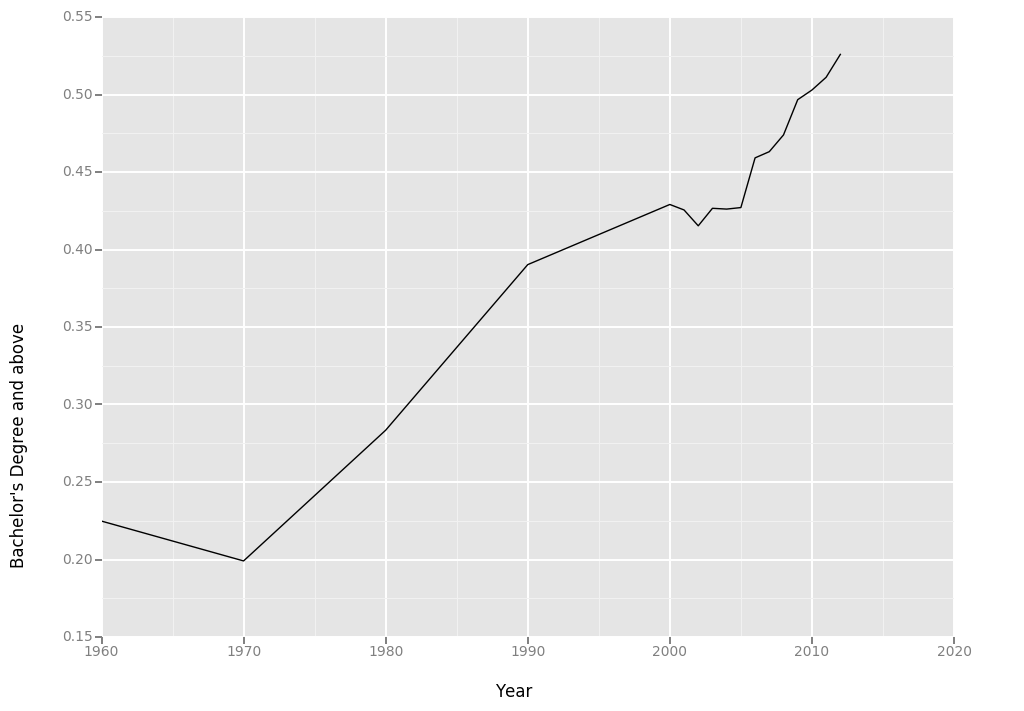

<ggplot: (-9223363293906910590)>

In [41]:
ggplot(aes(x='year', y = 'BAp_2534'), data = DD) + geom_line() + xlab("Year") +ylab("Bachelor's Degree and above")
#m+ scale_x_continuous(limits= c(0, 0)) + scale_y_continuous(limits = c(0, 0))


### When did the US encountered the highest marriage rate among high school graduates or less?

In [42]:
DD[['year', 'HS_2534']].sort_values(by = 'HS_2534', ascending = False).head(1)

,year,HS_2534
16,2012,0.573686


### Understanding the marriage rate among men who have Bachelor's degree and above and those who completed just high school 

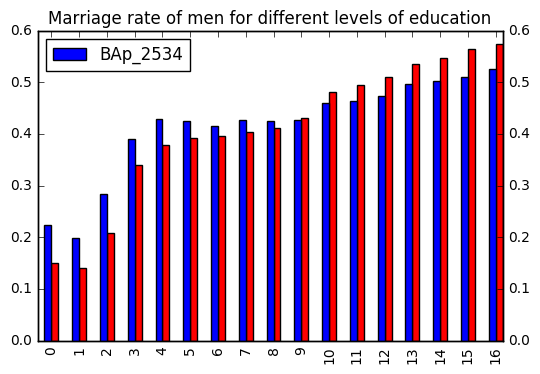

In [43]:

fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.set_title('Marriage rate of men for different levels of education')

DD['HS_2534'].plot(kind='bar', color='red', ax=ax, position=0, width=0.25)

DD['BAp_2534'].plot(kind='bar', color='blue', ax=ax2, position=1, width=0.25, legend =True)



Let's explore the divorce rate among men and women for different levels of education

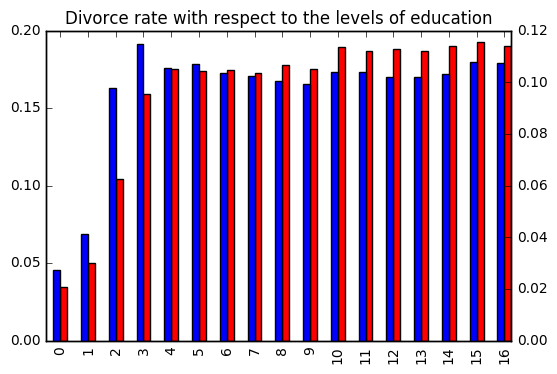

In [60]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.set_title('Divorce rate with respect to the levels of education')

dr['HS_3544'].plot(kind='bar', color='red', ax=ax, position=0, width=0.25)

dr['BAp_3544'].plot(kind='bar', color='blue', ax=ax2, position=1, width=0.25)

Let's change our topic of exploration a little bit to understand the marriage rate among different races.

In [57]:
# Columns end with _x and _y represent men and women respectively
mwmr[['year','Hisp_2534_x', 'Hisp_2534_y', 'Black_2534_x','Black_2534_y', 'White_2534_x', 'White_2534_y']].sort_values(by = ['Hisp_2534_x', 'Hisp_2534_y', 'Black_2534_x','Black_2534_y', 'White_2534_x', 'White_2534_y'],ascending=False)

,year,Hisp_2534_x,Hisp_2534_y,Black_2534_x,Black_2534_y,White_2534_x,White_2534_y
16,2012,0.541941,0.426991,0.687589,0.682059,0.514680,0.392048
15,2011,0.528108,0.419577,0.695414,0.667419,0.501257,0.380510
14,2010,0.513770,0.394008,0.675512,0.656936,0.491110,0.368710
13,2009,0.507118,0.386927,0.665879,0.652275,0.481377,0.361925
12,2008,0.480975,0.364283,0.645825,0.640571,0.458493,0.337421
11,2007,0.456701,0.351606,0.641037,0.630466,0.446229,0.326245
10,2006,0.448674,0.329933,0.626639,0.615373,0.434209,0.315572
9,2005,0.403624,0.306705,0.566881,0.581862,0.398222,0.289872
8,2004,0.392210,0.298135,0.566589,0.576916,0.384354,0.277180
7,2003,0.386227,0.290982,0.556734,0.557025,0.380288,0.271263


Let's explore the marriage gap between men and women of 3 races given in the data set.

In [61]:
mwmr['mgapamongwhites'] = mwmr['White_2534_x']-mwmr['White_2534_y']
mwmr['mgapamongblacks'] = mwmr['Black_2534_x']-mwmr['Black_2534_y']
mwmr['mgapamonghisp'] = mwmr['Hisp_2534_x']-mwmr['Hisp_2534_y']


In [62]:
mwmr[['year','mgapamongwhites',  'mgapamongblacks', 'mgapamonghisp']].sort_values(by = 'year',ascending=False)


,year,mgapamongwhites,mgapamongblacks,mgapamonghisp
16,2012,0.122632,0.005530,0.114950
15,2011,0.120747,0.027995,0.108531
14,2010,0.122400,0.018576,0.119762
13,2009,0.119452,0.013604,0.120192
12,2008,0.121072,0.005255,0.116691
11,2007,0.119984,0.010571,0.105095
10,2006,0.118637,0.011266,0.118741
9,2005,0.108350,-0.014980,0.096920
8,2004,0.107175,-0.010327,0.094075
7,2003,0.109025,-0.000291,0.095245


Let's switch our gear to find the average marriage rate among the races. We'll determine the average through using the column for men and women for each race from the merged table.

In [63]:
mwmr['avgwhites'] = mwmr[['White_2534_x', 'White_2534_y']].mean(axis =1)
mwmr['avgblacks'] = mwmr[['Black_2534_x', 'Black_2534_y']].mean(axis=1)
mwmr['avghisp'] = mwmr[['Hisp_2534_x','Hisp_2534_y']].mean(axis=1)

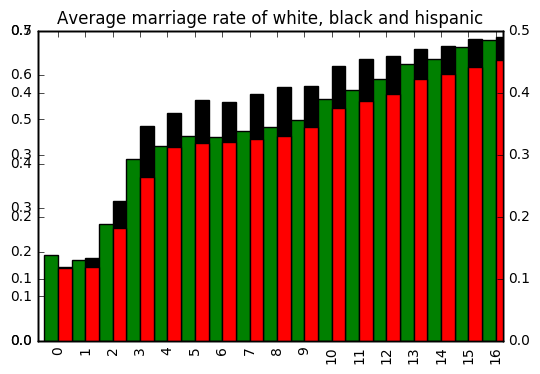

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Average marriage rate of white, black and hispanic')
ax2 = ax.twinx()
ax3 = ax2.twinx()

mwmr['avgwhites'].plot(kind='bar', color='red', ax=ax3, position=0, width=0.50)
mwmr['avgblacks'].plot(kind='bar', color='black', ax=ax, position=0, width=0.50)
mwmr['avghisp'].plot(kind='bar', color='green', ax=ax2, position=1, width=0.50)


### Understanding the marriage rate among white, black and hispanic men in the US
Let's explore the marriage rate just for men through bar graph.

In [66]:
DD[['year','Hisp_2534','Black_2534','White_2534' ]].sort_values(by =['Hisp_2534','Black_2534','White_2534'], ascending=False)

,year,Hisp_2534,Black_2534,White_2534
16,2012,0.541941,0.687589,0.514680
15,2011,0.528108,0.695414,0.501257
14,2010,0.513770,0.675512,0.491110
13,2009,0.507118,0.665879,0.481377
12,2008,0.480975,0.645825,0.458493
11,2007,0.456701,0.641037,0.446229
10,2006,0.448674,0.626639,0.434209
9,2005,0.403624,0.566881,0.398222
8,2004,0.392210,0.566589,0.384354
7,2003,0.386227,0.556734,0.380288


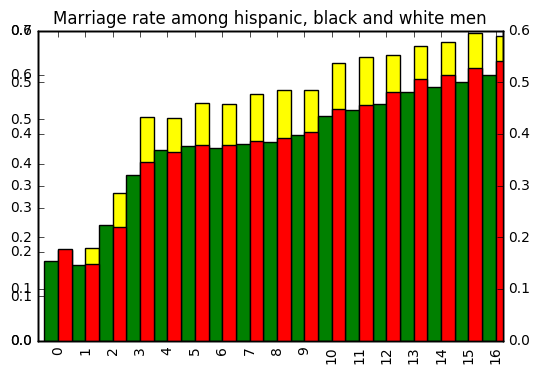

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Marriage rate among hispanic, black and white men')
ax2 = ax.twinx()
ax3 = ax2.twinx()


DD['Hisp_2534'].plot(kind='bar', color='red', ax=ax3, position=0, width=0.50)
DD['Black_2534'].plot(kind='bar', color='yellow', ax=ax, position=0, width=0.50)
DD['White_2534'].plot(kind='bar', color='green', ax=ax2, position=1, width=0.50)

This section will focus on understanding the effect of economic disparities on the marriage and divorce rate among men and women in the US. In order to understand the economic disparities, we'll catagorize the people into three classes - rich, middle and poor. The major questions to be explored in this section are, when was the marriage rate is relatively similar among the rich, middle and the poor? who is getting  married at a faster rate?
    
To begin with let's define the marriagegap and the divorcegap to be the difference between the marriage and the divorce rate among the rich and the poor.
    


In [68]:

mwmr[['year', 'rich_2534_x','rich_2534_y','poor_2534_x','poor_2534_y', 'mid_2534_x', 'mid_2534_y']].sort_values(by=['rich_2534_x','rich_2534_y','poor_2534_x','poor_2534_y', 'mid_2534_x', 'mid_2534_y'],ascending = False)

,year,rich_2534_x,rich_2534_y,poor_2534_x,poor_2534_y,mid_2534_x,mid_2534_y
16,2012,0.502351,0.309432,0.686924,0.625862,0.499678,0.413374
15,2011,0.492053,0.301791,0.675854,0.610537,0.487102,0.400492
14,2010,0.478376,0.284594,0.662610,0.596789,0.475098,0.387452
13,2009,0.468573,0.280022,0.651931,0.595321,0.468790,0.374930
12,2008,0.455910,0.261436,0.641428,0.578340,0.430316,0.351756
11,2007,0.443882,0.255036,0.618275,0.565550,0.415835,0.337782
10,2006,0.431818,0.247917,0.602822,0.545439,0.413722,0.327686
3,1990,0.362814,0.185201,0.468160,0.379916,0.281083,0.206403
4,2000,0.338113,0.196698,0.542729,0.472570,0.341773,0.258967
9,2005,0.326089,0.197993,0.584151,0.529957,0.390601,0.306078


In [69]:
DD['marriagegap'] = DD['poor_2534']-DD['rich_2534']
DD[['year','marriagegap']]

,year,marriagegap
0,1960,-0.114101
1,1970,-0.044360
2,1980,0.101380
3,1990,0.105346
4,2000,0.204616
5,2001,0.242984
6,2002,0.241352
7,2003,0.257082
8,2004,0.249962
9,2005,0.258062


In [71]:
 
marriagegapdata = DD[['year', 'marriagegap']]

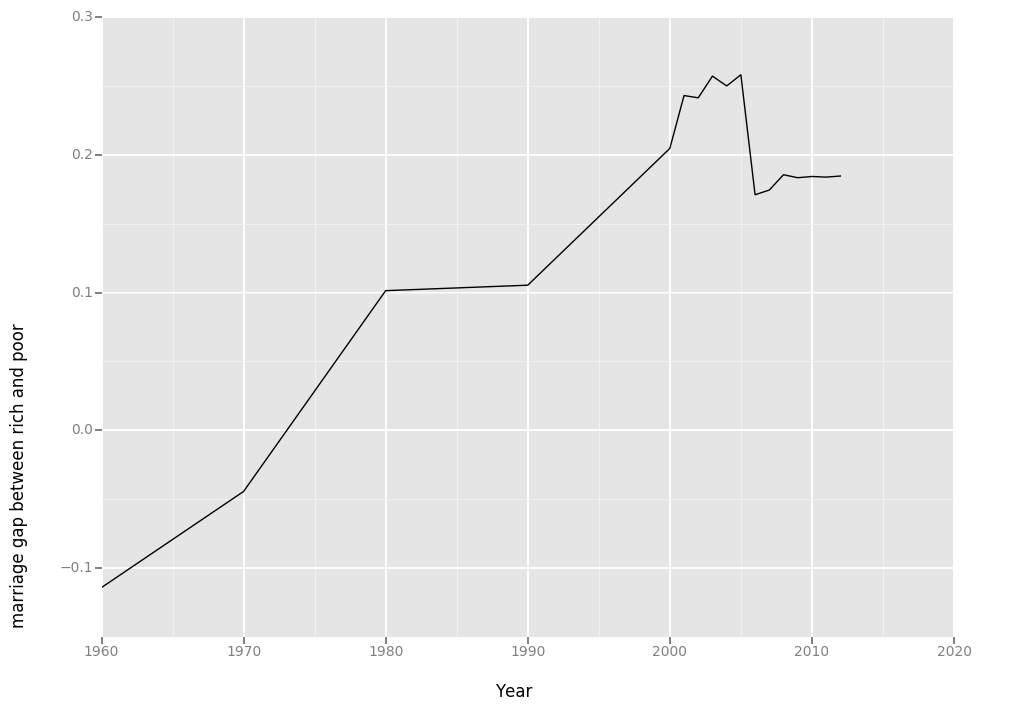

<ggplot: (-9223363293907946976)>

In [73]:
ggplot(aes(x='year', y = 'marriagegap'), data = marriagegapdata) + geom_line() + xlab("Year") +ylab("marriage gap between rich and poor")

In [75]:
dr['divorcegap'] = DD['poor_3544']-DD['rich_3544']
dr[['year','divorcegap']]

,year,divorcegap
0,1960,0.013763
1,1970,0.043157
2,1980,0.083841
3,1990,0.140799
4,2000,0.202326
5,2001,0.238280
6,2002,0.236701
7,2003,0.236191
8,2004,0.254895
9,2005,0.255507


In [76]:
divorcegapdata = dr[['year', 'divorcegap']]

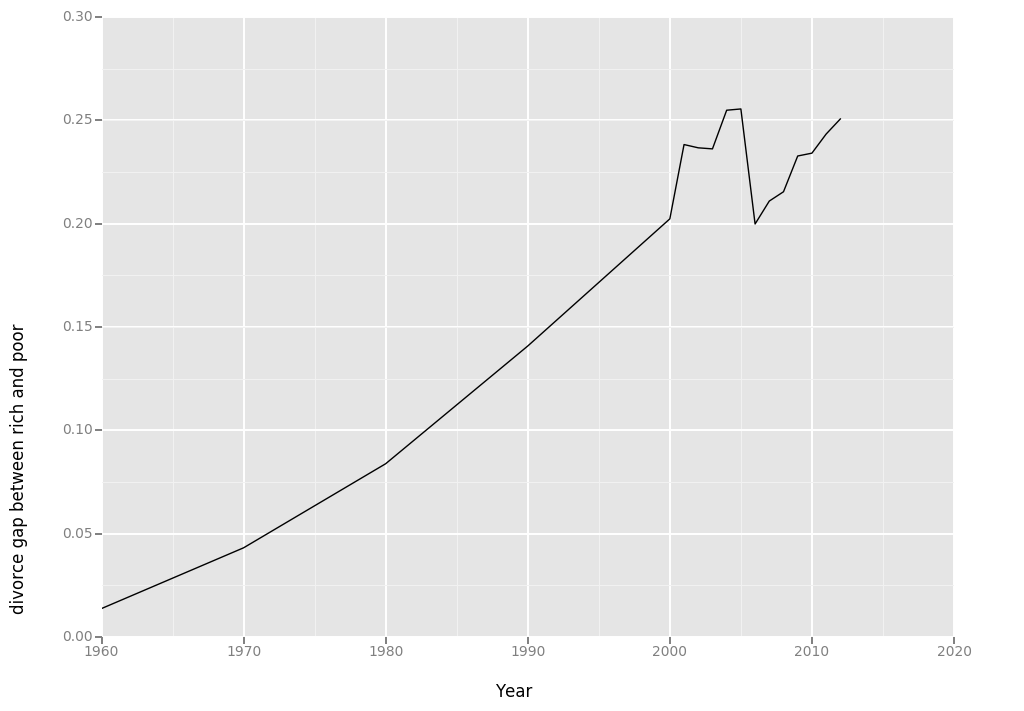

<ggplot: (8742946865619)>

In [77]:
ggplot(aes(x='year', y = 'divorcegap'), data = divorcegapdata) + geom_line() + xlab("Year") +ylab("divorce gap between rich and poor")

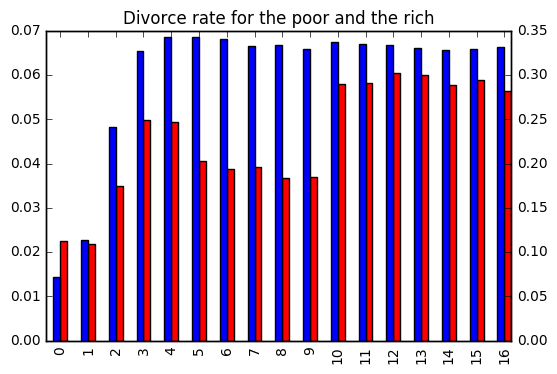

In [78]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.set_title('Divorce rate for the poor and the rich')

dr['rich_3544'].plot(kind='bar', color='red', ax=ax, position=0, width=0.25)

dr['poor_3544'].plot(kind='bar', color='blue', ax=ax2, position=1, width=0.25)

In this section, I'll explore the difference in the marriage rate among men and women for different levels of education. In order to accomplish the task, I'm going to join two tables - a table for men and a table for women. And I will call it 'mwmr'.

In [79]:
mwmr = pd.merge(DD, wm, how = 'left', on='year')
mw = mwmr[['year', 'BAp_2534_x', 'BAp_2534_y']]

In [81]:
mw['marriagegapmw'] = mw['BAp_2534_x'] - mw['BAp_2534_y']
mwmr.columns

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Index(['Unnamed: 0_x', 'year', 'date_x', 'all_2534_x', 'HS_2534_x',
       'SC_2534_x', 'BAp_2534_x', 'BAo_2534_x', 'GD_2534_x', 'White_2534_x',
       ...
       'kids_SC_2534_y', 'kids_BAp_2534_y', 'kids_BAo_2534_y',
       'kids_GD_2534_y', 'nokids_poor_2534_y', 'nokids_mid_2534_y',
       'nokids_rich_2534_y', 'kids_poor_2534_y', 'kids_mid_2534_y',
       'kids_rich_2534_y'],
      dtype='object', length=198)

In [52]:
mgapdata = mw[['year', 'marriagegapmw']]

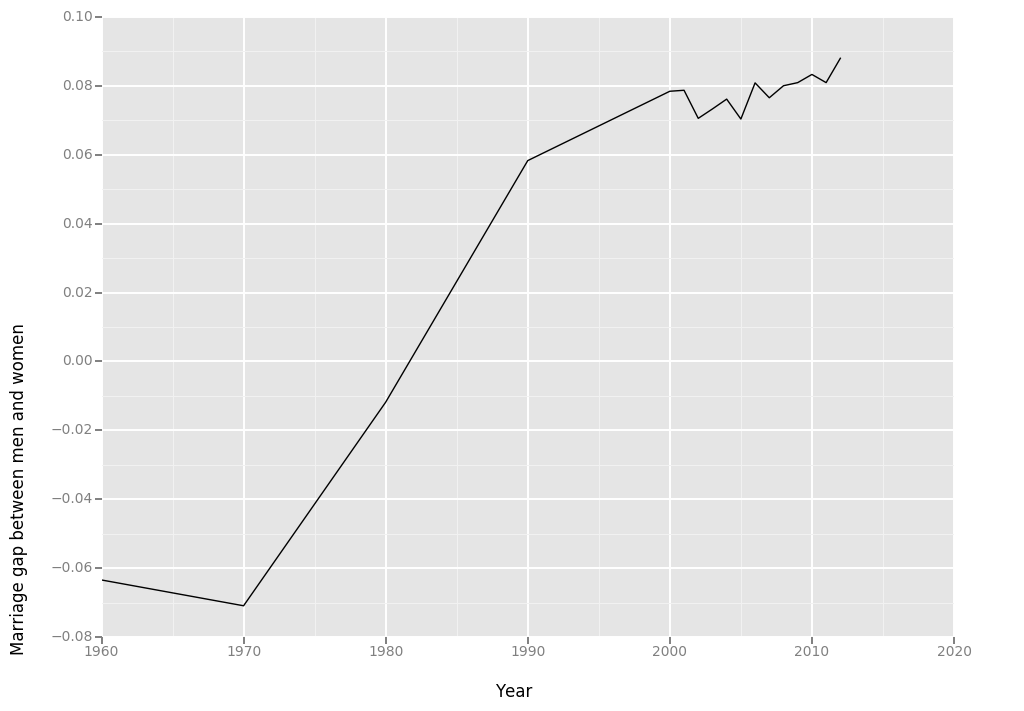

<ggplot: (8742946835127)>

In [82]:
ggplot(aes(x='year', y = 'marriagegapmw'), data = mgapdata) + geom_line() + xlab("Year") +ylab("Marriage gap between men and women")